In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from matplotlib.image import imread
import seaborn as sns
import pandas as pd
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.layers import Dropout
from keras.applications import MobileNet,Xception,VGG16,ResNet101,InceptionV3,DenseNet121,InceptionResNetV2,NASNetMobile
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions, preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
import imutils
from keras.models import Model
from keras.layers import Input
from keras.optimizers import Adam
from sklearn.metrics import  classification_report,confusion_matrix
import pickle as pkl
import zipfile as zf
import shutil
import re
import seaborn as sns
import random
from pickle import load,dump

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Image preprocessing

In [ ]:
# defining global variable path
image_path = "C:\\Users\\dalia\\Projet_DataScience\\final\\Dataset\\"
"""
function to load folder into arrays and 
then it returns that same array
"""
def loadImages(path,filename):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, filename, file)
         for file in os.listdir(path + "/"+filename) if      file.endswith('.jpeg')])         
 
    return image_files

In [ ]:
print("Number of plastic materials: {}".format(len(loadImages(image_path,"plastic")))+"\n"+
"Number of metal materials: {}".format(len(loadImages(image_path,"metal")))+"\n"+
"Number of glass materials: {}".format(len(loadImages(image_path,"glass")))+"\n"+
"Number of other materials: {}".format(len(loadImages(image_path,"empty"))))

Number of plastic materials: 303
Number of metal materials: 303
Number of glass materials: 303
Number of other materials: 303


## Displaying and visualization 

In [ ]:
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display_two(a, b, title1 = "Edited", title2 = "Original"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

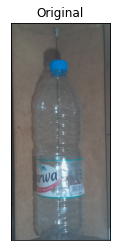

In [ ]:
display_one(imread(loadImages(image_path,"plastic")[0]))

In [ ]:
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:10]
  
    plt.figure(figsize=(12,12))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

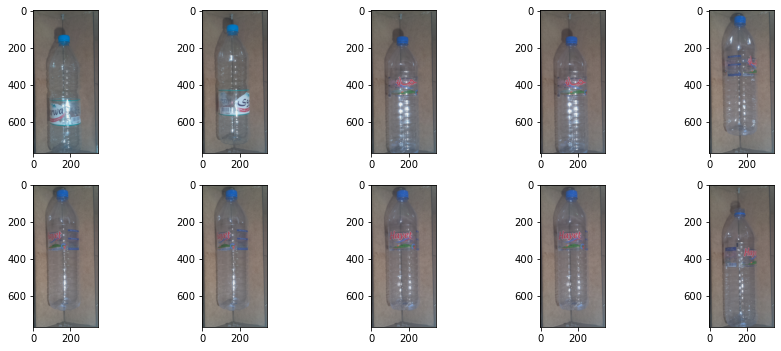

In [ ]:
plot_imgs(image_path+'\plastic')

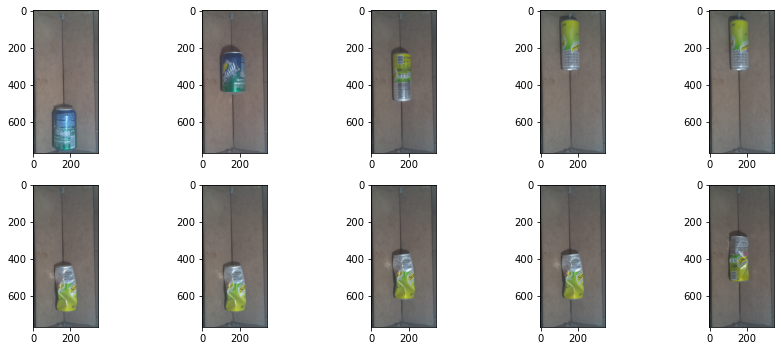

In [ ]:
plot_imgs(image_path+'\metal')

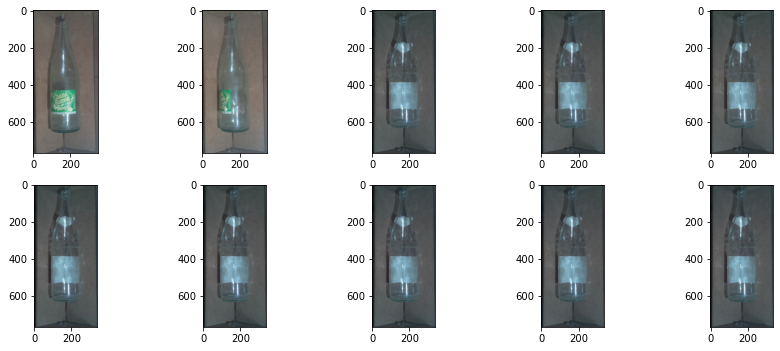

In [ ]:
plot_imgs(image_path+'\glass')

## Checking dimensions for all classes

In [ ]:
dim1 = []
dim2 = []
for image_filename in os.listdir(image_path+'\\plastic'):
    
    img = imread(image_path+'\\plastic'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
for image_filename in os.listdir(image_path+'\\metal'):
    
    img = imread(image_path+'\\metal'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
for image_filename in os.listdir(image_path+'\\glass'):
    
    img = imread(image_path+'\\glass'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
for image_filename in os.listdir(image_path+'\\empty'):
    
    img = imread(image_path+'\\empty'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

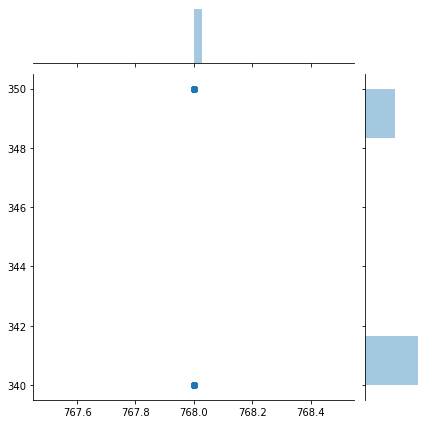

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
print("Average shape of images : {}".format((np.average(dim1),np.average(dim2))))

Average shape of images : (768.0, 343.6303630363036)


## Resizing  images

In [ ]:
# Preprocessing
def processing(data,b):
    # loading image
    # Getting 3 images to work with 
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    print('Original size',img[0].shape)
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[1].shape)
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_two(original,b)

Original size (768, 350, 3)
RESIZED (220, 220, 3)


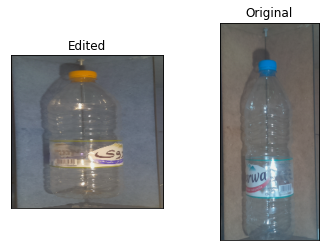

In [ ]:
processing(loadImages(image_path,"plastic"),imread(loadImages(image_path,"plastic")[0]))

## Remove noise

In [ ]:
def remove_noise(data):
    
    # Reading 3 images to work
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    try:
        print('Original size',img[0].shape)
    except AttributeError:
        print("shape not found")
   
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    try:
        print('RESIZED', res_img[1].shape)
    except AttributeError:
        print("shape not found")
    
    
    # Visualizing one of the images in the array
    original = res_img[1]
    # ----------------------------------
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        no_noise.append(blur)


    image = no_noise[1]
  
    display_two(original, image, 'Original', 'Blured')

Original size (768, 350, 3)
RESIZED (220, 220, 3)


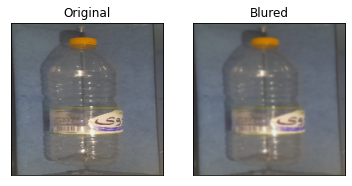

In [ ]:
remove_noise(loadImages(image_path,"plastic"))

Original size (768, 350, 3)
RESIZED (220, 220, 3)


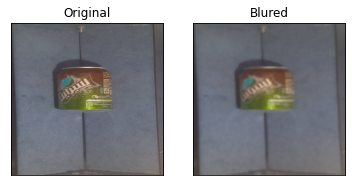

In [ ]:
remove_noise(loadImages(image_path,"metal"))

Original size (768, 350, 3)
RESIZED (220, 220, 3)


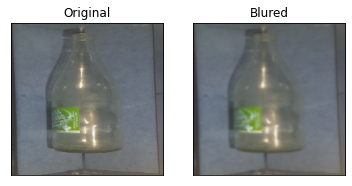

In [ ]:
remove_noise(loadImages(image_path,"glass"))

## Segmentation of objects

In [ ]:
def semgent_obj(data):
    
    # Reading 3 images to work
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    try:
        print('Original size',img[0].shape)
    except AttributeError:
        print("shape not found")
   
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    try:
        print('RESIZED', res_img[1].shape)
    except AttributeError:
        print("shape not found")
    
    
    # Visualizing one of the images in the array
    original = res_img[1]
    # ----------------------------------
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        no_noise.append(blur)


    image = no_noise[1]
    #---------------------------------
    # Segmentation
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TRIANGLE)

    # Displaying segmented images
    display_two(original, thresh, 'Original', 'Segmented')

Original size (768, 350, 3)
RESIZED (220, 220, 3)


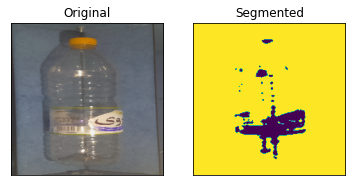

In [ ]:
semgent_obj(loadImages(image_path,"plastic"))

Original size (768, 350, 3)
RESIZED (220, 220, 3)


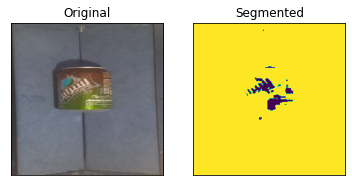

In [ ]:
semgent_obj(loadImages(image_path,"metal"))

Original size (768, 350, 3)
RESIZED (220, 220, 3)


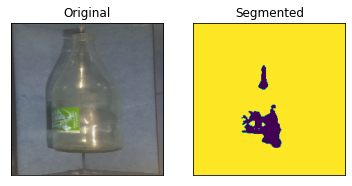

In [ ]:
semgent_obj(loadImages(image_path,"glass"))

## Segmentation of foreground from background

In [ ]:
# Preprocessing
def segment_Background(data):
    
    # Reading 3 images to work
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    try:
        print('Original size',img[0].shape)
    except AttributeError:
        print("shape not found")
   
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    try:
        print('RESIZED', res_img[1].shape)
    except AttributeError:
        print("shape not found")
    
    
    # Visualizing one of the images in the array
    original = res_img[1]
    # ----------------------------------
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        no_noise.append(blur)


    image = no_noise[1]
    #---------------------------------
    # Segmentation
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Displaying segmented images
    # Further noise removal (Morphology)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    #Displaying segmented back ground
    display_two(original, sure_bg, 'Original', 'Segmented Background')

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]

    # Displaying markers on the image
    display_two(original, markers, 'Original', 'Marked')

Original size (768, 350, 3)
RESIZED (220, 220, 3)


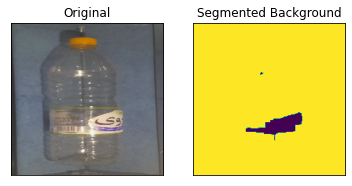

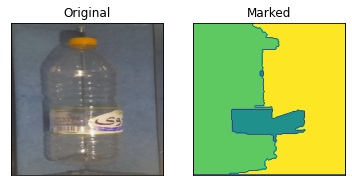

In [ ]:
segment_Background(loadImages(image_path,"plastic"))

Original size (768, 350, 3)
RESIZED (220, 220, 3)


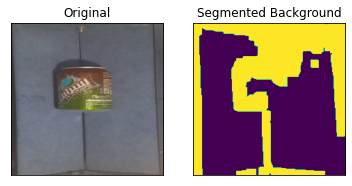

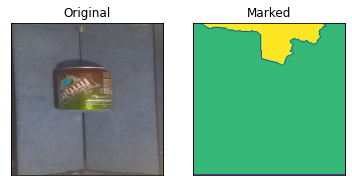

In [ ]:
segment_Background(loadImages(image_path,"metal"))

Original size (768, 350, 3)
RESIZED (220, 220, 3)


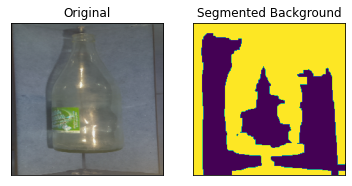

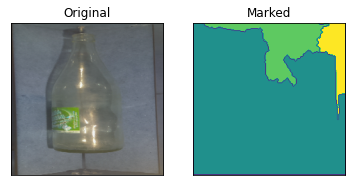

In [ ]:
segment_Background(loadImages(image_path,"glass"))

## Spliting data into 3 folders train test & valid

In [ ]:
os.listdir(os.path.join(os.getcwd(),"Final\\Dataset\\"))

['empty', 'glass', 'metal', 'plastic']

In [ ]:
## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.7*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpeg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [ ]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid', 'test']
waste_types = ['empty', 'glass', 'metal', 'plastic']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data2',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)

In [ ]:
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('Final\\Dataset\\',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data2/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data2/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    test_dest = "data2/test/"+waste_type
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files, test_dest)

## Checking number of images by folder

In [ ]:
from imutils import paths
train_dir = 'data/train'
validation_dir = 'data/valid/'
test_dir = 'data/test/'
totalTrain = len(list(paths.list_images(train_dir)))
totalVal = len(list(paths.list_images(validation_dir)))
totalTest = len(list(paths.list_images(test_dir)))
print("Total Training: ", totalTrain)
print("Total Validation: ",totalVal)
print("Total test: ", totalTest)

Total Training:  848
Total Validation:  180
Total test:  184


## Image augmentation

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2) 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
BATCH_SIZE = 16
TARGET_SIZE = (224, 224)

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                   target_size=TARGET_SIZE)     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                   batch_size=BATCH_SIZE,
                                                   color_mode='rgb',
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   target_size=TARGET_SIZE)

# initilaize the testing generator
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    class_mode="categorical",
    color_mode='rgb',
    target_size=TARGET_SIZE,  
    shuffle=False, 
    batch_size=BATCH_SIZE)

Found 848 images belonging to 4 classes.
Found 180 images belonging to 4 classes.
Found 184 images belonging to 4 classes.


## Modeling

In [ ]:
def create_cnn(num_classes,base):
    x=base.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
    x=Dropout(0.5)(x)
    x=Dense(1024,activation='relu')(x) #dense layer 2
    x=Dropout(0.5)(x)
    x=Dense(512,activation='relu')(x) #dense layer 3
    x=Dropout(0.2)(x)
    preds=Dense(num_classes,activation='softmax')(x) #final layer with softmax activation
    model=Model(inputs=base.input,outputs=preds)
    return model

In [ ]:
def define_trainable(num,model):
    for layer in model.layers[:num]:
        layer.trainable=False
    for layer in model.layers[num:]:
        layer.trainable=True

In [ ]:
def compling(model):
    print("[INFO] compiling model...")
    opt = Adam(lr=1e-5)
    model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

In [ ]:
def train_data(model,epo):
    print("[INFO] trainning head...")
    H = model.fit_generator( 
    train_generator,
    steps_per_epoch=totalTrain // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=totalVal // BATCH_SIZE,
    epochs=epo)
    return H

## Pretrained Model mobileNet and convolutional neural networks CNN

**MobileNet**

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False,
                     input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
#base_model.summary()

In [ ]:
model=create_cnn(4,base_model)

In [ ]:
len(model.layers)

95

In [ ]:
define_trainable(20,model)

In [ ]:
#model.summary()

In [ ]:
compling(model)

[INFO] compiling model...


In [ ]:
H1=train_data(model,18)

[INFO] trainning head...
Epoch 1/18
53/53 [==============================] - 28s 525ms/step - loss: 1.5866 - accuracy: 0.2960 - val_loss: 1.4537 - val_accuracy: 0.2500
Epoch 2/18
53/53 [==============================] - 15s 291ms/step - loss: 1.2803 - accuracy: 0.4186 - val_loss: 1.5375 - val_accuracy: 0.2744
Epoch 3/18
53/53 [==============================] - 15s 292ms/step - loss: 1.1089 - accuracy: 0.5200 - val_loss: 1.0595 - val_accuracy: 0.6159
Epoch 4/18
53/53 [==============================] - 23s 433ms/step - loss: 0.9581 - accuracy: 0.5873 - val_loss: 0.5049 - val_accuracy: 0.7500
Epoch 5/18
53/53 [==============================] - 17s 329ms/step - loss: 0.8430 - accuracy: 0.6568 - val_loss: 0.3730 - val_accuracy: 0.7561
Epoch 6/18
53/53 [==============================] - 17s 326ms/step - loss: 0.6980 - accuracy: 0.7347 - val_loss: 0.4599 - val_accuracy: 0.8476
Epoch 7/18
53/53 [==============================] - 17s 323ms/step - loss: 0.5965 - accuracy: 0.7818 - val_loss: 0.47

In [ ]:
with open('trainHistoryOld_mobilenet', 'wb') as handle: # saving the history of the model
    dump(H1.history, handle)

In [ ]:
with open('trainHistoryOld_mobilenet', 'rb') as file:
    history1=load(file)

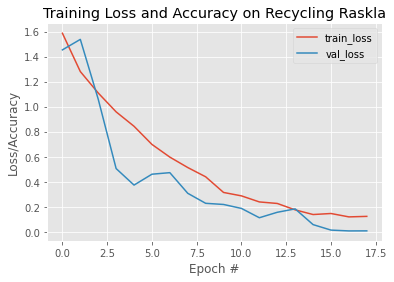

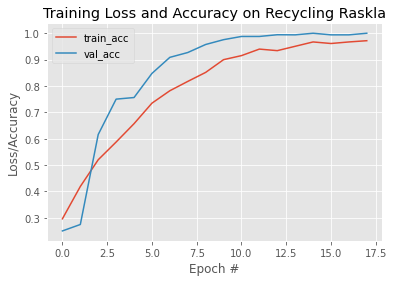

In [ ]:
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history1["loss"], label="train_loss")
plt.plot(N, history1["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()
plt.plot(N, history1["accuracy"], label="train_acc")
plt.plot(N, history1["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
print("[INFO] serializing network...")
model.save('models/mobilenet_reskla.h5')

[INFO] serializing network...


## Xception

In [ ]:
base_model2=Xception(weights='imagenet',include_top=False,
                     input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
model2=create_cnn(4,base_model2)

In [ ]:
len(model2.layers)

140

In [ ]:
define_trainable(48,model2)

In [ ]:
compling(model2)

[INFO] compiling model...


In [ ]:
H2=train_data(model2,18)

[INFO] trainning head...
Epoch 1/18
53/53 [==============================] - 47s 882ms/step - loss: 1.3699 - accuracy: 0.2995 - val_loss: 1.2937 - val_accuracy: 0.4318
Epoch 2/18
53/53 [==============================] - 36s 683ms/step - loss: 1.2948 - accuracy: 0.4399 - val_loss: 1.2496 - val_accuracy: 0.8171
Epoch 3/18
53/53 [==============================] - 36s 678ms/step - loss: 1.1774 - accuracy: 0.5708 - val_loss: 1.0771 - val_accuracy: 0.8293
Epoch 4/18
53/53 [==============================] - 36s 681ms/step - loss: 1.0271 - accuracy: 0.6792 - val_loss: 0.9036 - val_accuracy: 0.9024
Epoch 5/18
53/53 [==============================] - 36s 681ms/step - loss: 0.8443 - accuracy: 0.7795 - val_loss: 0.5197 - val_accuracy: 0.8780
Epoch 6/18
53/53 [==============================] - 36s 680ms/step - loss: 0.6554 - accuracy: 0.8396 - val_loss: 0.2156 - val_accuracy: 0.9024
Epoch 7/18
53/53 [==============================] - 36s 678ms/step - loss: 0.4731 - accuracy: 0.9033 - val_loss: 0.08

In [ ]:
with open('trainHistoryOld_xception', 'rb') as file:
    history2=load(file)


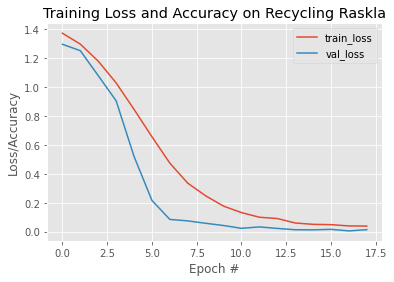

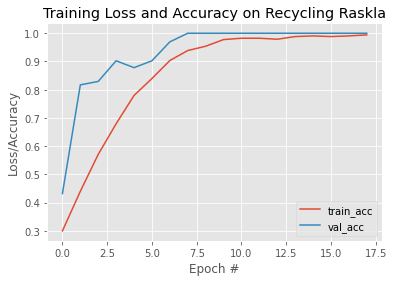

In [ ]:
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N,  history2["loss"], label="train_loss")
plt.plot(N,  history2["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()
plt.plot(N,  history2["accuracy"], label="train_acc")
plt.plot(N,  history2["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
print("[INFO] serializing network...")
model2.save('models/xception_reskla.h5')

## VGG16

In [ ]:
base_model3=VGG16(weights='imagenet',include_top=False,
                     input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
model3=create_cnn(4,base_model3)

In [ ]:
len(model3.layers)

27

In [ ]:
define_trainable(12,model3)

In [ ]:
compling(model3)

[INFO] compiling model...


In [ ]:
H3=train_data(model3,18)

[INFO] trainning head...
Epoch 1/18
53/53 [==============================] - 21s 399ms/step - loss: 1.4554 - accuracy: 0.2547 - val_loss: 1.3825 - val_accuracy: 0.6023
Epoch 2/18
53/53 [==============================] - 20s 370ms/step - loss: 1.3127 - accuracy: 0.3667 - val_loss: 0.8705 - val_accuracy: 0.5671
Epoch 3/18
53/53 [==============================] - 19s 361ms/step - loss: 1.0208 - accuracy: 0.5943 - val_loss: 0.4582 - val_accuracy: 0.8171
Epoch 4/18
53/53 [==============================] - 19s 361ms/step - loss: 0.5992 - accuracy: 0.8066 - val_loss: 0.2016 - val_accuracy: 0.9817
Epoch 5/18
53/53 [==============================] - 19s 367ms/step - loss: 0.2444 - accuracy: 0.9304 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 6/18
53/53 [==============================] - 21s 391ms/step - loss: 0.1458 - accuracy: 0.9517 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 7/18
53/53 [==============================] - 20s 379ms/step - loss: 0.0796 - accuracy: 0.9752 - val_loss: 4.50

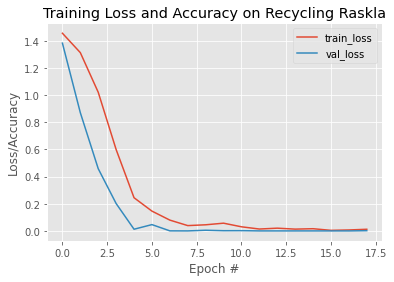

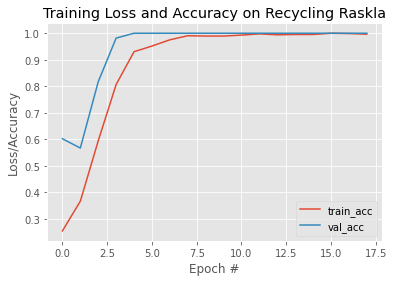

In [ ]:
with open('trainHistoryOld_vgg16', 'rb') as file:
    history3=load(file)
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N,  history3["loss"], label="train_loss")
plt.plot(N,   history3["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()
plt.plot(N,   history3["accuracy"], label="train_acc")
plt.plot(N,   history3["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
print("[INFO] serializing network...")
model3.save('models/vgg16_reskla.h5')

## ResNet

In [ ]:
base_model4=ResNet101(weights='imagenet',include_top=False,input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
model4=create_cnn(4,base_model4)

In [ ]:
len(model4.layers)

353

In [ ]:
define_trainable(176,model4)

In [ ]:
compling(model4)

[INFO] compiling model...


In [ ]:
H4=train_data(model4,18)

[INFO] trainning head...
Epoch 1/18
53/53 [==============================] - 81s 2s/step - loss: 1.4180 - accuracy: 0.3125 - val_loss: 1.4631 - val_accuracy: 0.2557
Epoch 2/18
53/53 [==============================] - 53s 997ms/step - loss: 1.0817 - accuracy: 0.5295 - val_loss: 1.4141 - val_accuracy: 0.2744
Epoch 3/18
53/53 [==============================] - 51s 958ms/step - loss: 0.7655 - accuracy: 0.7476 - val_loss: 1.3890 - val_accuracy: 0.2744
Epoch 4/18
53/53 [==============================] - 51s 961ms/step - loss: 0.4992 - accuracy: 0.8656 - val_loss: 1.5203 - val_accuracy: 0.2744
Epoch 5/18
53/53 [==============================] - 51s 965ms/step - loss: 0.3179 - accuracy: 0.9210 - val_loss: 1.5018 - val_accuracy: 0.2744
Epoch 6/18
53/53 [==============================] - 53s 1s/step - loss: 0.2029 - accuracy: 0.9528 - val_loss: 1.6800 - val_accuracy: 0.2744
Epoch 7/18
53/53 [==============================] - 52s 974ms/step - loss: 0.1314 - accuracy: 0.9811 - val_loss: 1.7502 - v

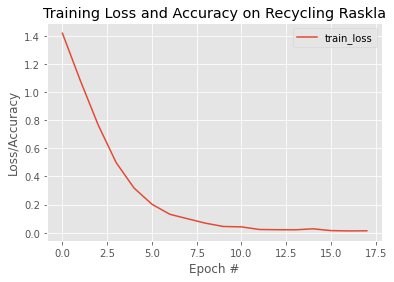

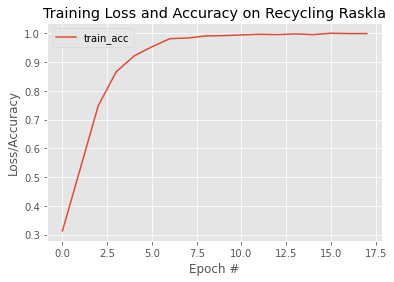

In [ ]:
with open('trainHistoryOld_resenet', 'rb') as file:
    history4=load(file)
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N,  history4["loss"], label="train_loss")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()
plt.plot(N,   history4["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
print("[INFO] serializing network...")
model4.save('models/resnet_reskla.h5')

## Inception

In [ ]:
base_model5=InceptionV3(weights='imagenet',include_top=False,
                     input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
model5=create_cnn(4,base_model5)

In [ ]:
len(model5.layers)

319

In [ ]:
define_trainable(100,model5)

In [ ]:
compling(model5)


[INFO] compiling model...


In [ ]:
H5=train_data(model5,18)

[INFO] trainning head...
Epoch 1/18
53/53 [==============================] - 46s 862ms/step - loss: 1.4297 - accuracy: 0.2936 - val_loss: 1.3707 - val_accuracy: 0.7159
Epoch 2/18
53/53 [==============================] - 23s 431ms/step - loss: 1.2995 - accuracy: 0.3892 - val_loss: 1.2312 - val_accuracy: 0.8780
Epoch 3/18
53/53 [==============================] - 22s 412ms/step - loss: 1.1668 - accuracy: 0.5024 - val_loss: 1.0882 - val_accuracy: 0.9207
Epoch 4/18
53/53 [==============================] - 22s 413ms/step - loss: 0.9904 - accuracy: 0.6486 - val_loss: 0.8295 - val_accuracy: 0.9512
Epoch 5/18
53/53 [==============================] - 22s 412ms/step - loss: 0.7891 - accuracy: 0.7642 - val_loss: 0.5365 - val_accuracy: 0.9512
Epoch 6/18
53/53 [==============================] - 22s 412ms/step - loss: 0.6165 - accuracy: 0.8208 - val_loss: 0.2501 - val_accuracy: 0.9695
Epoch 7/18
53/53 [==============================] - 22s 412ms/step - loss: 0.4601 - accuracy: 0.8856 - val_loss: 0.07

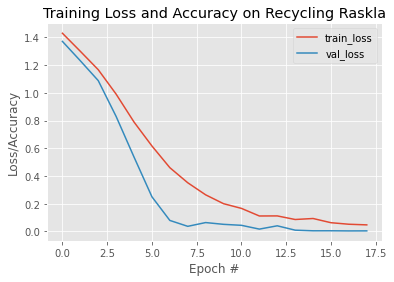

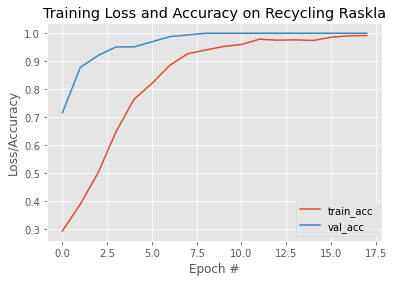

In [ ]:
with open('trainHistoryOld_inception', 'rb') as file:
    history5=load(file)
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N,  history5["loss"], label="train_loss")
plt.plot(N,  history5["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()
plt.plot(N,  history5["accuracy"], label="train_acc")
plt.plot(N,  history5["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
print("[INFO] serializing network...")
model5.save('models/inception_reskla.h5')

## Densenet

In [ ]:
base_model6=DenseNet121(weights='imagenet',include_top=False,
                     input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
model6=create_cnn(4,base_model6)

In [ ]:
len(model6.layers)

435

In [ ]:
define_trainable(200,model6)

In [ ]:
compling(model6)

[INFO] compiling model...


In [ ]:
H6=train_data(model6,18)

[INFO] trainning head...
Epoch 1/18
53/53 [==============================] - 64s 1s/step - loss: 1.4930 - accuracy: 0.3042 - val_loss: 1.2111 - val_accuracy: 0.6818
Epoch 2/18
53/53 [==============================] - 33s 631ms/step - loss: 1.2592 - accuracy: 0.4316 - val_loss: 1.0923 - val_accuracy: 0.8659
Epoch 3/18
53/53 [==============================] - 32s 595ms/step - loss: 1.0872 - accuracy: 0.5460 - val_loss: 0.9260 - val_accuracy: 0.9329
Epoch 4/18
53/53 [==============================] - 32s 598ms/step - loss: 0.9549 - accuracy: 0.6238 - val_loss: 0.6419 - val_accuracy: 0.9512
Epoch 5/18
53/53 [==============================] - 32s 596ms/step - loss: 0.7625 - accuracy: 0.7276 - val_loss: 0.3550 - val_accuracy: 0.9634
Epoch 6/18
53/53 [==============================] - 32s 598ms/step - loss: 0.6592 - accuracy: 0.7700 - val_loss: 0.4280 - val_accuracy: 0.9756
Epoch 7/18
53/53 [==============================] - 32s 599ms/step - loss: 0.5261 - accuracy: 0.8337 - val_loss: 0.3599 

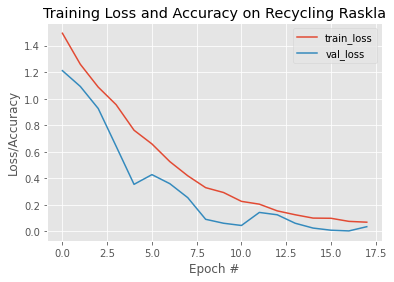

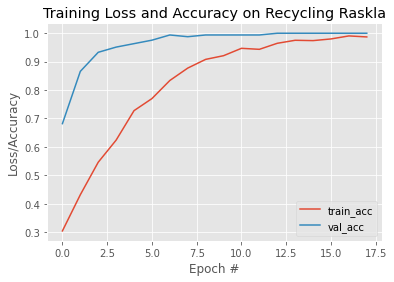

In [ ]:
with open('trainHistoryOld_densenet', 'rb') as file:
    history6=load(file)
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N,  history6["loss"], label="train_loss")
plt.plot(N,  history6["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()
plt.plot(N,  history6["accuracy"], label="train_acc")
plt.plot(N,  history6["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
print("[INFO] serializing network...")
model6.save('models/densnet_reskla.h5')

## InceptionResNetV

In [ ]:
base_model7=InceptionResNetV2(weights='imagenet',include_top=False,
                     input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
model7=create_cnn(4,base_model7)

In [ ]:
len(model7.layers)

788

In [ ]:
define_trainable(350,model7)

In [ ]:
compling(model7)

[INFO] compiling model...


In [ ]:
H7=train_data(model7,18)

[INFO] trainning head...
Epoch 1/18
53/53 [==============================] - 90s 2s/step - loss: 1.3842 - accuracy: 0.2818 - val_loss: 1.1299 - val_accuracy: 0.3239
Epoch 2/18
53/53 [==============================] - 46s 871ms/step - loss: 1.2467 - accuracy: 0.4469 - val_loss: 1.0634 - val_accuracy: 0.5427
Epoch 3/18
53/53 [==============================] - 45s 858ms/step - loss: 1.1155 - accuracy: 0.5755 - val_loss: 1.0575 - val_accuracy: 0.8963
Epoch 4/18
53/53 [==============================] - 45s 856ms/step - loss: 0.8944 - accuracy: 0.7382 - val_loss: 0.9680 - val_accuracy: 0.9268
Epoch 5/18
53/53 [==============================] - 45s 855ms/step - loss: 0.7190 - accuracy: 0.7889 - val_loss: 0.6411 - val_accuracy: 0.9695
Epoch 6/18
53/53 [==============================] - 45s 858ms/step - loss: 0.4912 - accuracy: 0.8844 - val_loss: 0.3219 - val_accuracy: 0.9878
Epoch 7/18
53/53 [==============================] - 45s 856ms/step - loss: 0.3348 - accuracy: 0.9399 - val_loss: 0.1086 

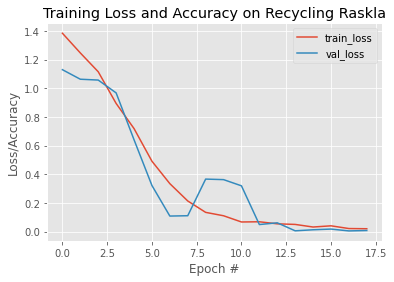

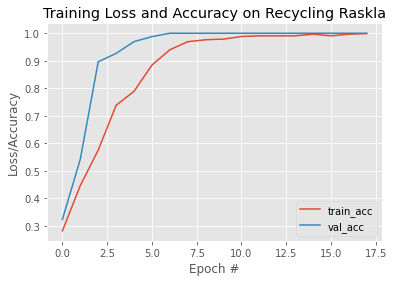

In [ ]:
with open('trainHistoryOld_inceptionresnet', 'rb') as file:
    history7=load(file)
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N,  history7["loss"], label="train_loss")
plt.plot(N,  history7["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()
plt.plot(N,  history7["accuracy"], label="train_acc")
plt.plot(N,  history7["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
print("[INFO] serializing network...")
model7.save('models/inceptionResnet_reskla.h5')

## NASNetMobile

In [ ]:
base_model8=NASNetMobile(weights='imagenet',include_top=False,
                     input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
model8=create_cnn(4,base_model8)

In [ ]:
len(model8.layers)

777

In [ ]:
define_trainable(300,model8)

In [ ]:
compling(model8)

[INFO] compiling model...


In [ ]:
H8=train_data(model8,18)

[INFO] trainning head...
Epoch 1/18
53/53 [==============================] - 78s 1s/step - loss: 1.4531 - accuracy: 0.3078 - val_loss: 1.2299 - val_accuracy: 0.5795
Epoch 2/18
53/53 [==============================] - 25s 475ms/step - loss: 1.3214 - accuracy: 0.3915 - val_loss: 1.0190 - val_accuracy: 0.7439
Epoch 3/18
53/53 [==============================] - 25s 467ms/step - loss: 1.2000 - accuracy: 0.4611 - val_loss: 1.0112 - val_accuracy: 0.8415
Epoch 4/18
53/53 [==============================] - 26s 482ms/step - loss: 1.0740 - accuracy: 0.5861 - val_loss: 0.9406 - val_accuracy: 0.9146
Epoch 5/18
53/53 [==============================] - 26s 483ms/step - loss: 0.9636 - accuracy: 0.6274 - val_loss: 0.7915 - val_accuracy: 0.9390
Epoch 6/18
53/53 [==============================] - 25s 479ms/step - loss: 0.7995 - accuracy: 0.7288 - val_loss: 0.6037 - val_accuracy: 0.9390
Epoch 7/18
53/53 [==============================] - 25s 465ms/step - loss: 0.6791 - accuracy: 0.7748 - val_loss: 0.4972 

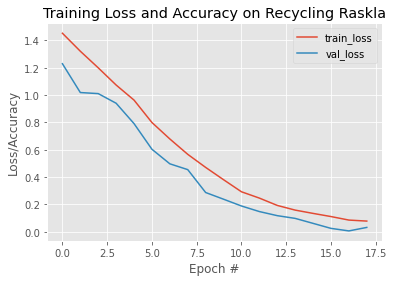

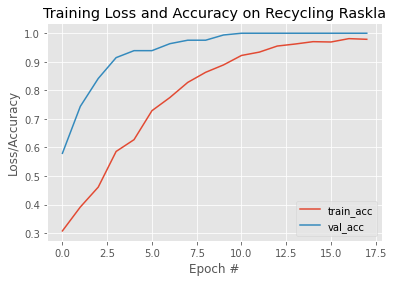

In [ ]:
with open('trainHistoryOld_nasnetmobile', 'rb') as file:
    history8=load(file)
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N,  history8["loss"], label="train_loss")
plt.plot(N,  history8["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()
plt.plot(N,  history8["accuracy"], label="train_acc")
plt.plot(N,  history8["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Recycling Raskla")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
print("[INFO] serializing network...")
model8.save('models/nasnet_reskla1.h5')

## Evaluation

**Accuarcy and error comparaison**

**Mobilenet**

In [ ]:
model = load_model('models\mobilenet_reskla.h5')


In [ ]:
model.evaluate(test_generator)

12/12 [==============================] - 7s 621ms/step


[0.006886155344545841, 1.0]

**Densenet**

In [ ]:
model2 = load_model('models\densnet_reskla.h5')

In [ ]:
model2.evaluate(test_generator)

12/12 [==============================] - 12s 1s/step


[0.00920644961297512, 1.0]

**Inception**

In [ ]:
model3 = load_model('models\inception_reskla.h5')

In [ ]:
model3.evaluate(test_generator)

12/12 [==============================] - 11s 926ms/step


[0.007992624305188656, 1.0]

**InceptionResnet**

In [ ]:
model4 = load_model('models\inceptionResnet_reskla.h5')

In [ ]:
model4.evaluate(test_generator)

12/12 [==============================] - 14s 1s/step


[0.034069787710905075, 1.0]

**NasnetMobile**

In [ ]:
model5 = load_model('nasnetmobile_reskla.h5')

In [ ]:
model5.evaluate(test_generator)

12/12 [==============================] - 12s 1s/step


[0.26137855648994446, 1.0]

**Resnet**

In [ ]:
model6 = load_model('resnet_reskla.h5')

In [ ]:
model6.evaluate(test_generator)

12/12 [==============================] - 10s 862ms/step


[0.0009733380284160376, 1.0]

**Vgg16**

In [ ]:
model7 = load_model('vgg16_reskla.h5')

In [ ]:
model7.evaluate(test_generator)

12/12 [==============================] - 5s 428ms/step


[1.4901160305669237e-08, 1.0]

**Xception**

In [ ]:
model8 = load_model('xception_reskla.h5')

In [ ]:
model8.evaluate(test_generator)

12/12 [==============================] - 6s 508ms/step


[0.012192975729703903, 1.0]

**Curves of all models**

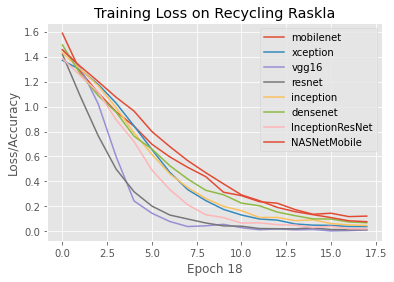

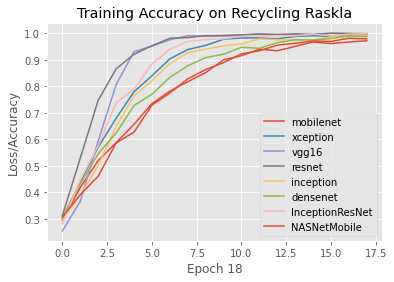

In [ ]:
with open('trainHistoryOld_nasnetmobile', 'rb') as file:
    history8=load(file)
N = np.arange(0, 18)
plt.style.use("ggplot")
plt.figure()
plt.plot(N,  history1["loss"], label="mobilenet")
plt.plot(N,  history2["loss"], label="xception")
plt.plot(N,  history3["loss"], label="vgg16")
plt.plot(N,  history4["loss"], label="resnet")
plt.plot(N,  history5["loss"], label="inception")
plt.plot(N,  history6["loss"], label="densenet")
plt.plot(N,  history7["loss"], label="InceptionResNet")
plt.plot(N,  history8["loss"], label="NASNetMobile")
plt.title("Training Loss on Recycling Raskla")
plt.xlabel("Epoch 18")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.figure()

plt.plot(N,  history1["accuracy"], label="mobilenet")
plt.plot(N,  history2["accuracy"], label="xception")
plt.plot(N,  history3["accuracy"], label="vgg16")
plt.plot(N,  history4["accuracy"], label="resnet")
plt.plot(N,  history5["accuracy"], label="inception")
plt.plot(N,  history6["accuracy"], label="densenet")
plt.plot(N,  history7["accuracy"], label="InceptionResNet")
plt.plot(N,  history8["accuracy"], label="NASNetMobile")
plt.title("Training Accuracy on Recycling Raskla")
plt.xlabel("Epoch 18")
plt.ylabel("Loss/Accuracy")
plt.legend()

**Best Models**

- ResNet
- Vgg16
- InceptionResNet
- Xception
- Inception
- Densnet
- NasNetMobile
- MobileNet

## Evaluation

## Classification Report

In [ ]:
# reset the testing generator and evaluate the network after
# fine-tuning just the network head
print("[INFO] evaluating after fine-tuning network head...")
test_generator.reset()
predIdxs = model.predict_generator(test_generator, 
     steps=(totalTest // BATCH_SIZE) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_generator.classes, predIdxs, 
     target_names=test_generator.class_indices.keys()))
# plot_training(H, 50, config.WARMUP_PLOT_PATH)

[INFO] evaluating after fine-tuning network head...
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00        46
       glass       1.00      1.00      1.00        46
       metal       1.00      1.00      1.00        46
     plastic       1.00      1.00      1.00        46

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



## Confusion Matrix 

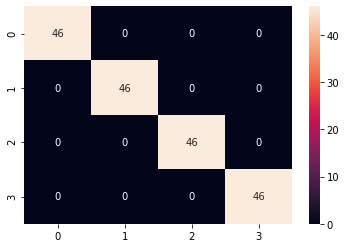

In [ ]:
sns.heatmap(confusion_matrix(test_generator.classes, predIdxs),annot=True)

## Testing

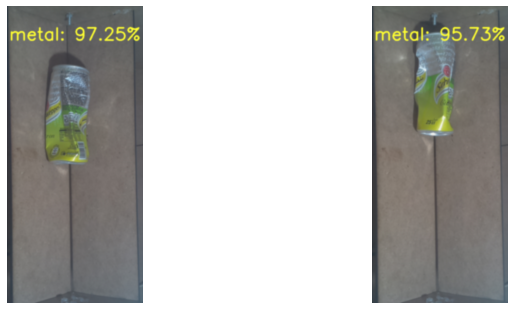

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 2
# Index for iterating over images
pic_index = 0
plt.figure(figsize=(20,20))
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 6, nrows * 6)

# pic_index += 8

# load the input image and then clone it so we can draw on it later
waste_types = ['empty', 'glass', 'metal', 'plastic']
test_d = 'data/test/' + waste_types[2] + '/'
# test_d = 'mytest/'
test_files = os.listdir(test_d)[0:2]
for i, fn in enumerate(test_files):
    
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1, facecolor='red')
    sp.axis('Off') # Don't show axes (or gridlines)
    # predicting images
    path = test_d + fn
    image = cv2.imread(path)

    img = load_img(path, target_size=TARGET_SIZE)

    output = image.copy()
    output = imutils.resize(output, width=400)

    img = img_to_array(img)
    
    # our model was trained on RGB ordered images but OpenCV represents
    # images in BGR order, so swap the channels, and then resize to
    # 224x224 (the input dimensions for VGG16)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, TARGET_SIZE)
    # print(image.shape)
    
    # convert the image to a floating point data type and perform mean
    # subtraction
    image = image.astype("float32") / 255.
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # pass the image through the network to obtain our predictions
    # preds = model.predict(np.expand_dims(image / 255., axis=0))[0]
    preds = model.predict(img)[0]
    i = np.argmax(preds)
    label = waste_types[i]
    # print(label)
    
    # draw the prediction on the output image
    text = "{}: {:.2f}%".format(label, preds[i] * 100)
    cv2.putText(output, text, (6, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.7,
        (50, 255, 255), 3)
    
    # show the output image
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB), interpolation = 'bicubic')
    # cv2.imshow("Output", output)
    # cv2.waitKey(0)
plt.show()

In [ ]:
from keras.models import load_model
from matplotlib.image import imread

In [ ]:
model=load_model('mobile_reskla.h5')

In [ ]:
path='0225085458.jpg'

In [ ]:
waste_types = ['empty', 'glass', 'metal', 'plastic']

In [ ]:
image = cv2.imread(path)
img = load_img(path, target_size=(224, 224))

In [ ]:
output = image.copy()
output = imutils.resize(output, width=400)

img = img_to_array(img)
    
    # our model was trained on RGB ordered images but OpenCV represents
    # images in BGR order, so swap the channels, and then resize to
    # 224x224 (the input dimensions for VGG16)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
    # print(image.shape)
    
    # convert the image to a floating point data type and perform mean
    # subtraction
image = image.astype("float32") / 255.
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

    # pass the image through the network to obtain our predictions
    # preds = model.predict(np.expand_dims(image / 255., axis=0))[0]
preds = model.predict(img)
i=np.argmax(preds)
label = waste_types[i]


In [ ]:
label

'metal'

In [ ]:
print(confusion_matrix(test_generator.classes,predicted_class_indices))